Plots saved to ../logs/


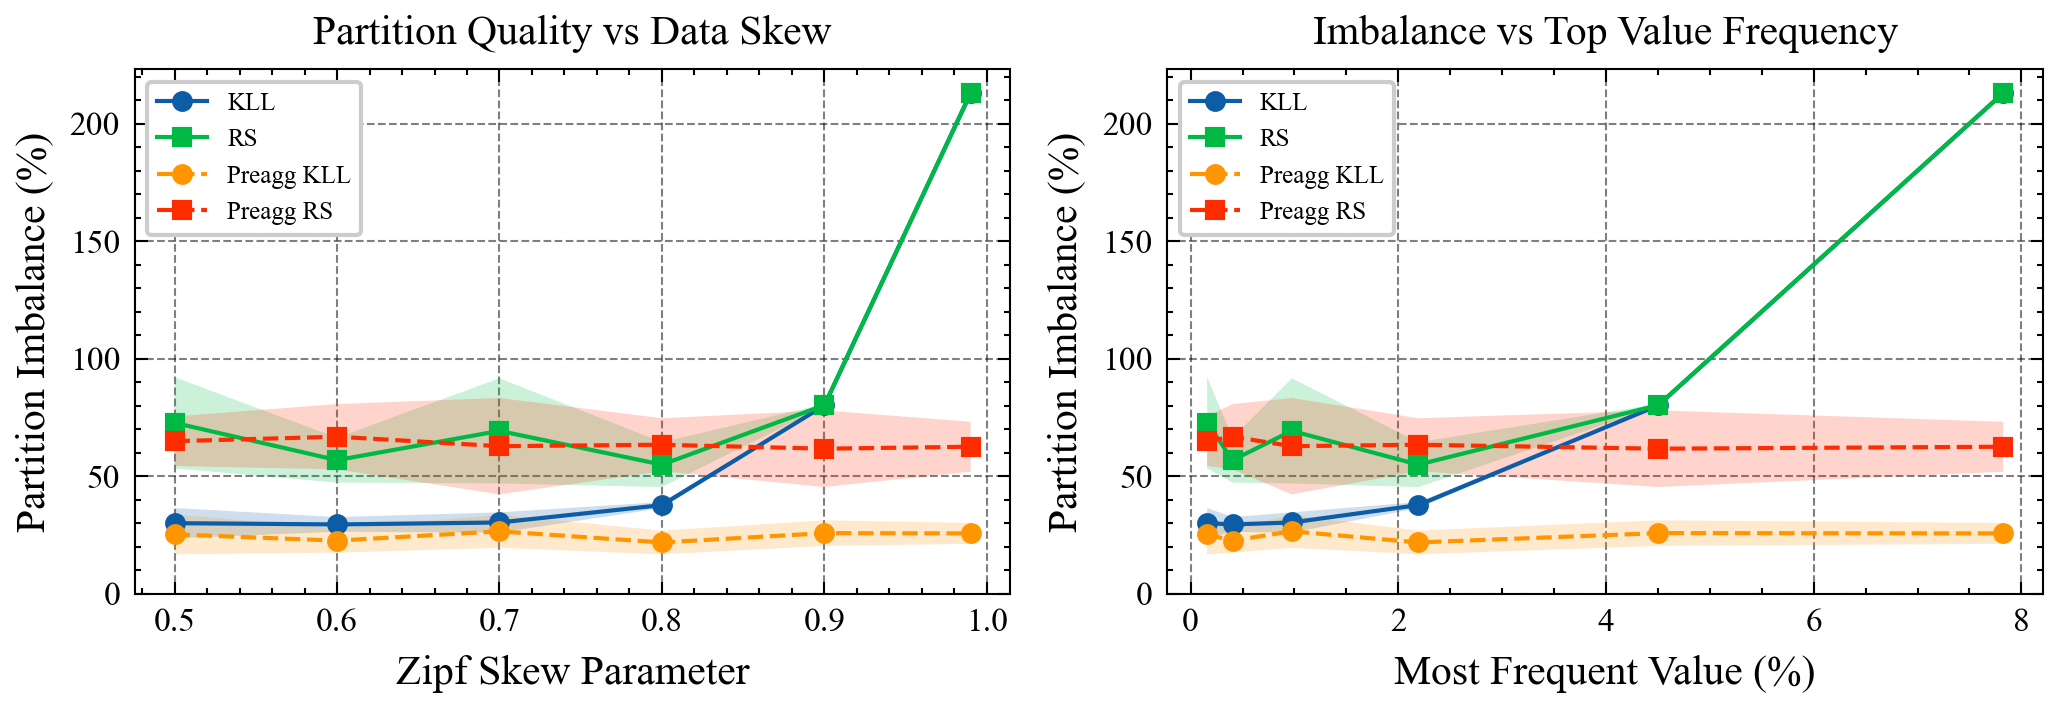


SUMMARY STATISTICS

Partition Imbalance by Skew:
 skew sketch_type  imbalance_pct_mean  imbalance_pct_std
 0.50         KLL            30.02536           6.443670
 0.50  PREAGG_KLL            25.25854           8.520022
 0.50   PREAGG_RS            64.89545          10.538582
 0.50          RS            72.71176          19.406566
 0.60         KLL            29.48708           3.122766
 0.60  PREAGG_KLL            22.59466           5.118516
 0.60   PREAGG_RS            66.80781          13.895226
 0.60          RS            56.84672           9.554055
 0.70         KLL            30.31580           4.305976
 0.70  PREAGG_KLL            26.57116           7.023702
 0.70   PREAGG_RS            62.77894          20.496865
 0.70          RS            69.28544          22.356895
 0.80         KLL            37.71592           1.299271
 0.80  PREAGG_KLL            21.81752           5.052227
 0.80   PREAGG_RS            63.39562          11.270736
 0.80          RS            54.92676 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# CONFIGURATION
# ==========================================
CSV_FILE = '../logs/sketch_partition_benchmark.csv'
OUTPUT_DIR = '../logs/'

# ==========================================
# LOAD DATA
# ==========================================
df = pd.read_csv(CSV_FILE)

# Calculate mean and std for each skew and sketch type
stats_df = df.groupby(['skew', 'sketch_type']).agg({
    'imbalance_pct': ['mean', 'std'],
    'variance': ['mean', 'std'],
    'top1_pct': 'mean',
    'top2_pct': 'mean',
    'top3_pct': 'mean'
}).reset_index()

# Flatten column names
stats_df.columns = ['_'.join(col).strip('_') for col in stats_df.columns.values]

# ==========================================
# PLOTTING
# ==========================================
plt.style.use('../logs/custom_plt_style.mplstyle')

fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))

# Separate data for each sketch type
kll_data = stats_df[stats_df['sketch_type'] == 'KLL']
rs_data = stats_df[stats_df['sketch_type'] == 'RS']
preagg_kll_data = stats_df[stats_df['sketch_type'] == 'PREAGG_KLL']
preagg_rs_data = stats_df[stats_df['sketch_type'] == 'PREAGG_RS']

# ---------------------------------------------------------
# PLOT 1: Imbalance vs Skew
# ---------------------------------------------------------
ax1 = axes[0]

# Plot standard approaches
ax1.plot(kll_data['skew'], kll_data['imbalance_pct_mean'], 'o-', label='KLL', markersize=4)
ax1.fill_between(kll_data['skew'], 
                  kll_data['imbalance_pct_mean'] - kll_data['imbalance_pct_std'],
                  kll_data['imbalance_pct_mean'] + kll_data['imbalance_pct_std'],
                  alpha=0.2)

ax1.plot(rs_data['skew'], rs_data['imbalance_pct_mean'], 's-', label='RS', markersize=4)
ax1.fill_between(rs_data['skew'],
                  rs_data['imbalance_pct_mean'] - rs_data['imbalance_pct_std'],
                  rs_data['imbalance_pct_mean'] + rs_data['imbalance_pct_std'],
                  alpha=0.2)

# Plot preaggregated approaches
ax1.plot(preagg_kll_data['skew'], preagg_kll_data['imbalance_pct_mean'], 'o--', label='Preagg KLL', markersize=4)
ax1.fill_between(preagg_kll_data['skew'],
                  preagg_kll_data['imbalance_pct_mean'] - preagg_kll_data['imbalance_pct_std'],
                  preagg_kll_data['imbalance_pct_mean'] + preagg_kll_data['imbalance_pct_std'],
                  alpha=0.2)

ax1.plot(preagg_rs_data['skew'], preagg_rs_data['imbalance_pct_mean'], 's--', label='Preagg RS', markersize=4)
ax1.fill_between(preagg_rs_data['skew'],
                  preagg_rs_data['imbalance_pct_mean'] - preagg_rs_data['imbalance_pct_std'],
                  preagg_rs_data['imbalance_pct_mean'] + preagg_rs_data['imbalance_pct_std'],
                  alpha=0.2)

ax1.set_xlabel('Zipf Skew Parameter')
ax1.set_ylabel('Partition Imbalance (%)')
ax1.set_title('Partition Quality vs Data Skew')
ax1.legend()
ax1.set_ylim(bottom=0)

# ---------------------------------------------------------
# PLOT 2: Imbalance vs Top Value Frequency
# ---------------------------------------------------------
ax2 = axes[1]

# Use top1_pct as x-axis to show relationship between data skew and partition quality
ax2.plot(kll_data['top1_pct_mean'], kll_data['imbalance_pct_mean'], 'o-', label='KLL', markersize=4)
ax2.fill_between(kll_data['top1_pct_mean'],
                  kll_data['imbalance_pct_mean'] - kll_data['imbalance_pct_std'],
                  kll_data['imbalance_pct_mean'] + kll_data['imbalance_pct_std'],
                  alpha=0.2)

ax2.plot(rs_data['top1_pct_mean'], rs_data['imbalance_pct_mean'], 's-', label='RS', markersize=4)
ax2.fill_between(rs_data['top1_pct_mean'],
                  rs_data['imbalance_pct_mean'] - rs_data['imbalance_pct_std'],
                  rs_data['imbalance_pct_mean'] + rs_data['imbalance_pct_std'],
                  alpha=0.2)

ax2.plot(preagg_kll_data['top1_pct_mean'], preagg_kll_data['imbalance_pct_mean'], 'o--', label='Preagg KLL', markersize=4)
ax2.fill_between(preagg_kll_data['top1_pct_mean'],
                  preagg_kll_data['imbalance_pct_mean'] - preagg_kll_data['imbalance_pct_std'],
                  preagg_kll_data['imbalance_pct_mean'] + preagg_kll_data['imbalance_pct_std'],
                  alpha=0.2)

ax2.plot(preagg_rs_data['top1_pct_mean'], preagg_rs_data['imbalance_pct_mean'], 's--', label='Preagg RS', markersize=4)
ax2.fill_between(preagg_rs_data['top1_pct_mean'],
                  preagg_rs_data['imbalance_pct_mean'] - preagg_rs_data['imbalance_pct_std'],
                  preagg_rs_data['imbalance_pct_mean'] + preagg_rs_data['imbalance_pct_std'],
                  alpha=0.2)

ax2.set_xlabel('Most Frequent Value (%)')
ax2.set_ylabel('Partition Imbalance (%)')
ax2.set_title('Imbalance vs Top Value Frequency')
ax2.legend()
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/sketch_partition_comparison.png', dpi=300)
plt.savefig(f'{OUTPUT_DIR}/sketch_partition_comparison.svg')
print(f"Plots saved to {OUTPUT_DIR}")
plt.show()

# ==========================================
# PRINT SUMMARY STATISTICS
# ==========================================
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print("\nPartition Imbalance by Skew:")
print(stats_df[['skew', 'sketch_type', 'imbalance_pct_mean', 'imbalance_pct_std']].to_string(index=False))

print("\nTop Value Frequencies by Skew:")
print(stats_df[['skew', 'top1_pct_mean', 'top2_pct_mean', 'top3_pct_mean']].drop_duplicates().to_string(index=False))